# Exploratory Data Analysis (EDA)
by: masood janbackloo

## Modules

In [ ]:
# Standard modules
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

# Graphical modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [ ]:
# Dataset
df = pd.read_csv('dataset_processed.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,sars-cov-2_exam_result,patient_admission,patient_age_quantile,basophils,eosinophils,hematocrit,hemoglobin,leukocytes,lymphocytes,mean_corpuscular_hemoglobin_(mch),mean_corpuscular_hemoglobin_concentration (mchc),mean_corpuscular_volume_(mcv),mean_platelet_volume_,monocytes,platelets,red_blood_cell_distribution_width_(rdw),red_blood_cells,have_respiratory_disease
0,0,0,17,-0.223767,1.482158,0.236515,-0.022340,-0.094610,0.318366,-0.292269,-0.950790,0.166192,0.010677,0.357547,-0.517413,-0.625073,0.102004,1
1,0,2,1,-0.223767,1.018625,-1.571682,-0.774212,0.364550,-0.005738,0.178175,3.331071,-1.336024,-1.672222,0.068652,1.429667,-0.978899,-0.850035,0
2,0,0,9,0.081693,-0.666950,-0.747693,-0.586244,-0.884923,-1.114514,1.746323,0.542882,1.668409,-0.213711,1.276759,-0.429480,-1.067355,-1.361315,1
3,0,0,11,-0.834685,-0.709090,0.991838,0.792188,-0.211488,0.045436,0.334989,-0.452899,0.606842,-0.550290,-0.220244,0.072992,0.171035,0.542763,1
4,0,0,9,0.387152,-0.709090,0.190738,-0.147652,-1.132592,0.002791,-0.083183,-1.249524,0.566783,1.020415,2.012129,-0.668155,0.613318,-0.127191,0


## Improve readability of column names

In [ ]:
# Fix a unicode problem in columns
df.columns = [col.replace('\xa0','_') for col in df.columns]

In [ ]:
df.columns

Index(['sars-cov-2_exam_result', 'patient_admission', 'patient_age_quantile',
       'basophils', 'eosinophils', 'hematocrit', 'hemoglobin', 'leukocytes',
       'lymphocytes', 'mean_corpuscular_hemoglobin_(mch)',
       'mean_corpuscular_hemoglobin_concentration_(mchc)',
       'mean_corpuscular_volume_(mcv)', 'mean_platelet_volume_', 'monocytes',
       'platelets', 'red_blood_cell_distribution_width_(rdw)',
       'red_blood_cells', 'have_respiratory_disease'],
      dtype='object')

In [ ]:
# Improve variables readability (better for plots)
df.columns = ['COVID-19 Exam result',
              'Patient admission',
              'Patient age quantile',
              'Basophils',
              'Eosinophils',
              'Hematocrit',
              'Hemoglobin',
              'Leukocytes',
              'Lymphocytes',
              'MCH',
              'MCHC',
              'MCV',
              'MPV',
              'Monocytes',
              'Platelets',
              'RDW',
              'Red blood cells',
              'Respiratory Disease detection']

In [ ]:
# Set variable groups
vars_person_info = ['Patient age quantile']
vars_blood_exams = ['Basophils','Eosinophils','Hematocrit','Hemoglobin','Leukocytes','Lymphocytes','MCH','MCHC','MCV','MPV',
                    'Monocytes','Platelets','RDW','Red blood cells']
vars_baseline_diseases = ['Respiratory disease detection']

# Exploratory Data Analysis


## Correlation plot for Blood exams

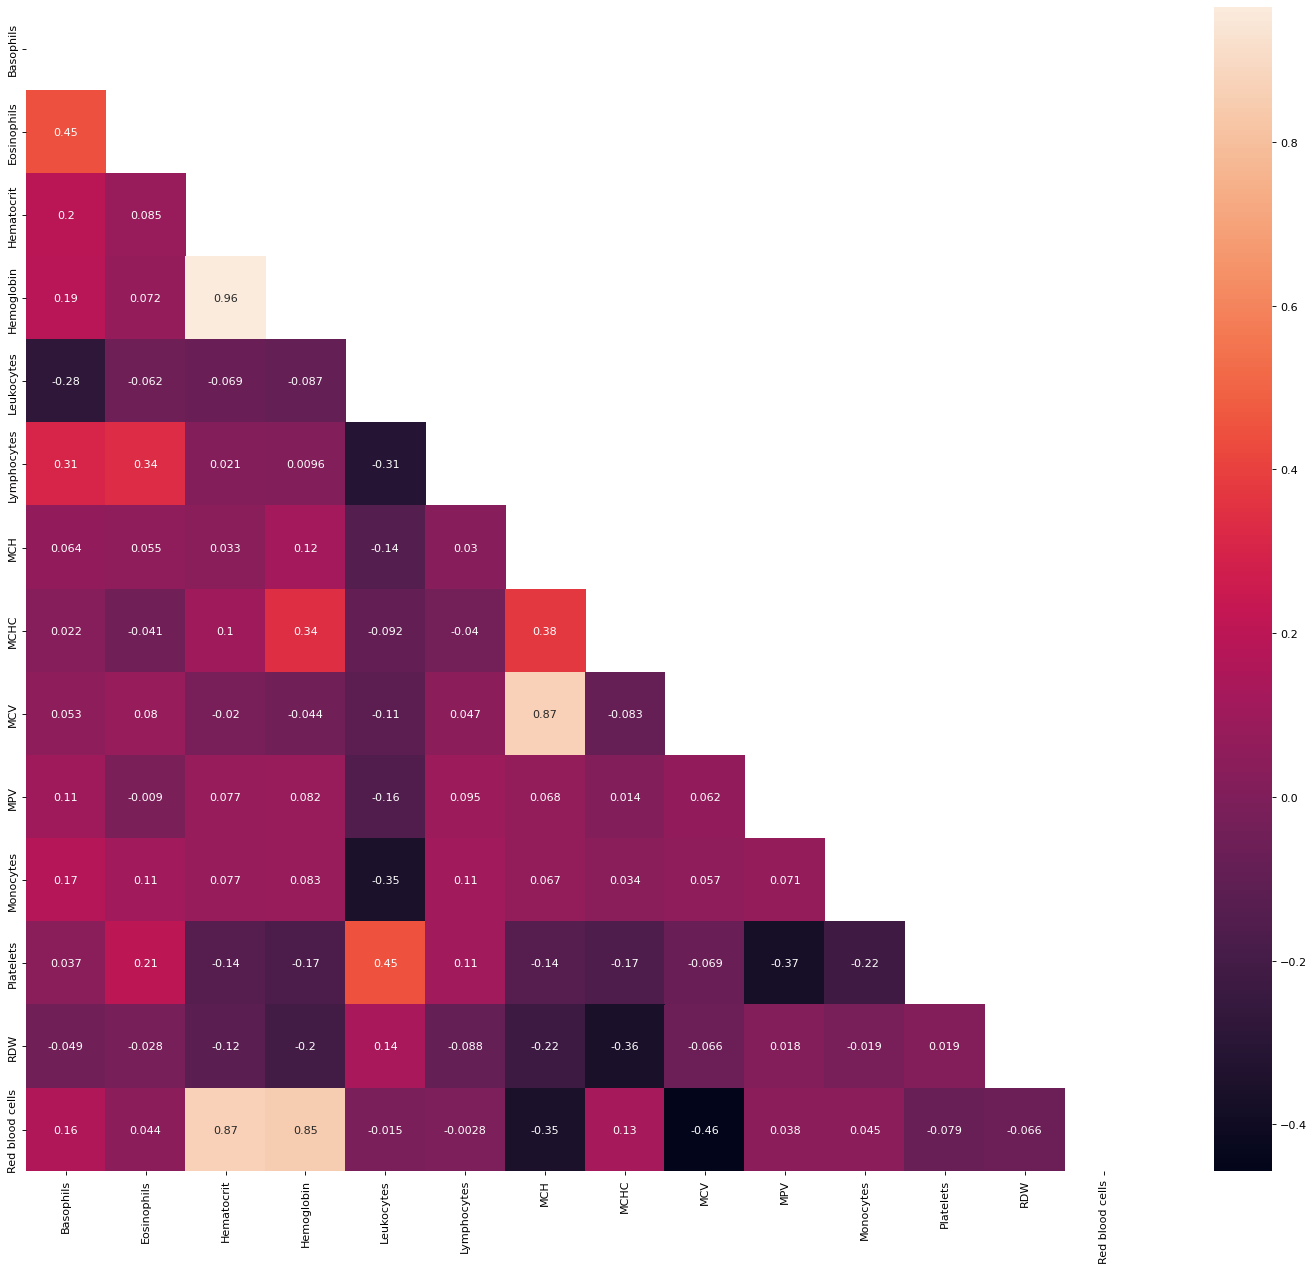

In [ ]:
# Correlation calculation
spearman_corr = df[vars_blood_exams].corr('spearman')
matrix = np.triu(spearman_corr)

# Plot
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(spearman_corr, annot = True, mask=matrix)
plt.tight_layout()

### Commentary
Here you can see that we have strong correlations (higher than 0.8) between some blood exam variables:
- **0.87** between `Hematocrit` and `Red blood cells`
- **0.85** between `Hemoglobin` and `Red blood cells`
- **0.96** between `Hematocrit` and `Hemoglobin`
- **0.87** between `MCV` and `MCH`

I will choose to **remove those high correlations** to avoid miss interprations in *feature analysis* methods or decrease model quality as Logistic Regression.

- From `Red blood cells`, `Hematocrit` and `Hemoglobin` I will keep `Hemoglobin`, because its value is more general and used in the medical field to detect various problems such as anemia.
- From `MCV` and `MCH` I will keep `MCV`, because `MCV` definition is highly related to `Red blood cells` (removed before) different from `MCH` related to Hemoglobin (keeped before). Besides that `MCV` correlation with `Red blood cells` is higher than `MCH` correlation with `Red blood cells`, so the idea is too keep the maximum of information.

In [ ]:
# Removing highly correlated features
df.drop(axis=1, inplace=True, columns=['Hematocrit', 'Red blood cells', 'MCH'])

In [ ]:
# Change variable group of blood exams
vars_blood_exams = ['Basophils','Eosinophils','Hemoglobin','Leukocytes','Lymphocytes','MCHC','MCV','MPV',
                    'Monocytes','Platelets','RDW']

## KDE Distribution for Blood exams split by COVID-19 results

In [ ]:
data = df.copy()
target_0 = data[data['COVID-19 Exam result'] == 0]
target_1 = data[data['COVID-19 Exam result'] == 1]

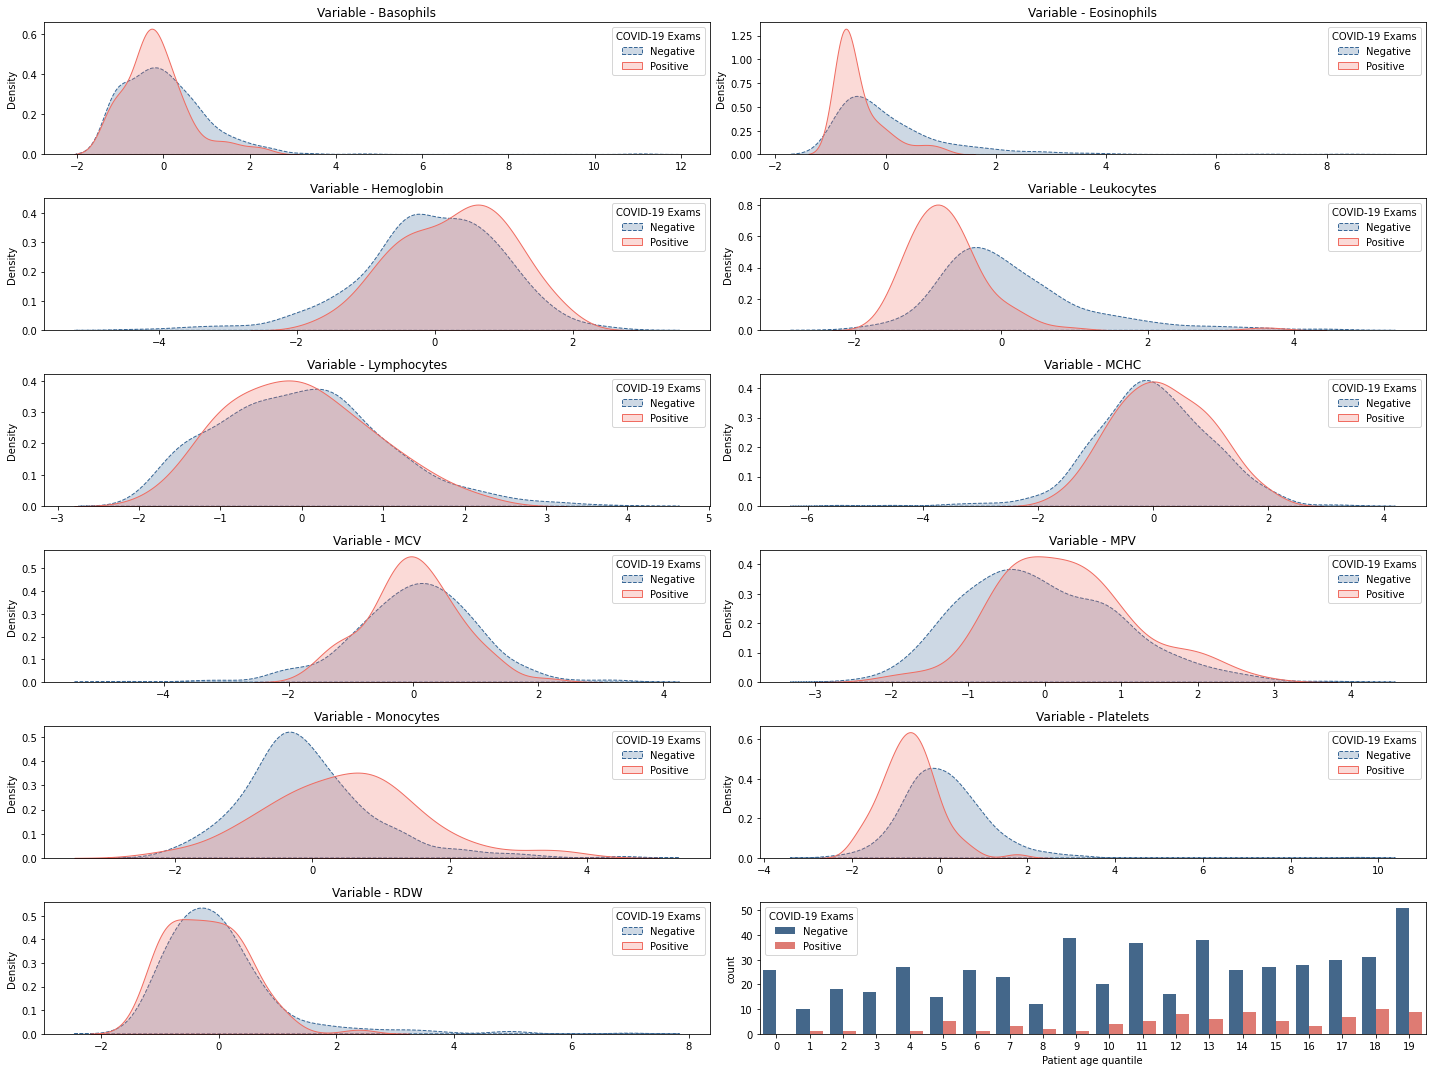

In [ ]:
# PLOT - KDE Dist plots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,15))
r = 0      # Index row
c = 0      # Index col

# Blood features
for f in vars_blood_exams:
    # Plot distribuição
    sns.kdeplot(list(target_0[f]), shade=True, color='#386796', ax=axes[r][c], label='Negative', linestyle="--")
    sns.kdeplot(list(target_1[f]), shade=True, color='#F06C61', ax=axes[r][c], label='Positive')
    # Plot configs
    axes[r][c].legend(title='COVID-19 Exams', loc='right left')
    axes[r][c].set_title('Variable - ' + f)
    # Index control
    c += 1
    if c > 1:
        c = 0
        r += 1
        
# Age feature
sns.countplot(x='Patient age quantile', hue='COVID-19 Exam result', data=data, palette={0:'#386796',1:'#F06C61'})
axes[r][c].legend(labels=['Negative', 'Positive'], title='COVID-19 Exams', loc='upper left')

plt.tight_layout()

## KDE Distribution for Leucogram features split by Patient Admission

In [ ]:
# Def features
leucogram_vars = ['Basophils','Eosinophils','Leukocytes','Lymphocytes','Monocytes']
# Set data by split
data = df.copy()
target_0 = data[data['Patient admission'] == 0]
target_1 = data[data['Patient admission'] == 1]
target_2 = data[data['Patient admission'] == 2]
target_3 = data[data['Patient admission'] == 3]

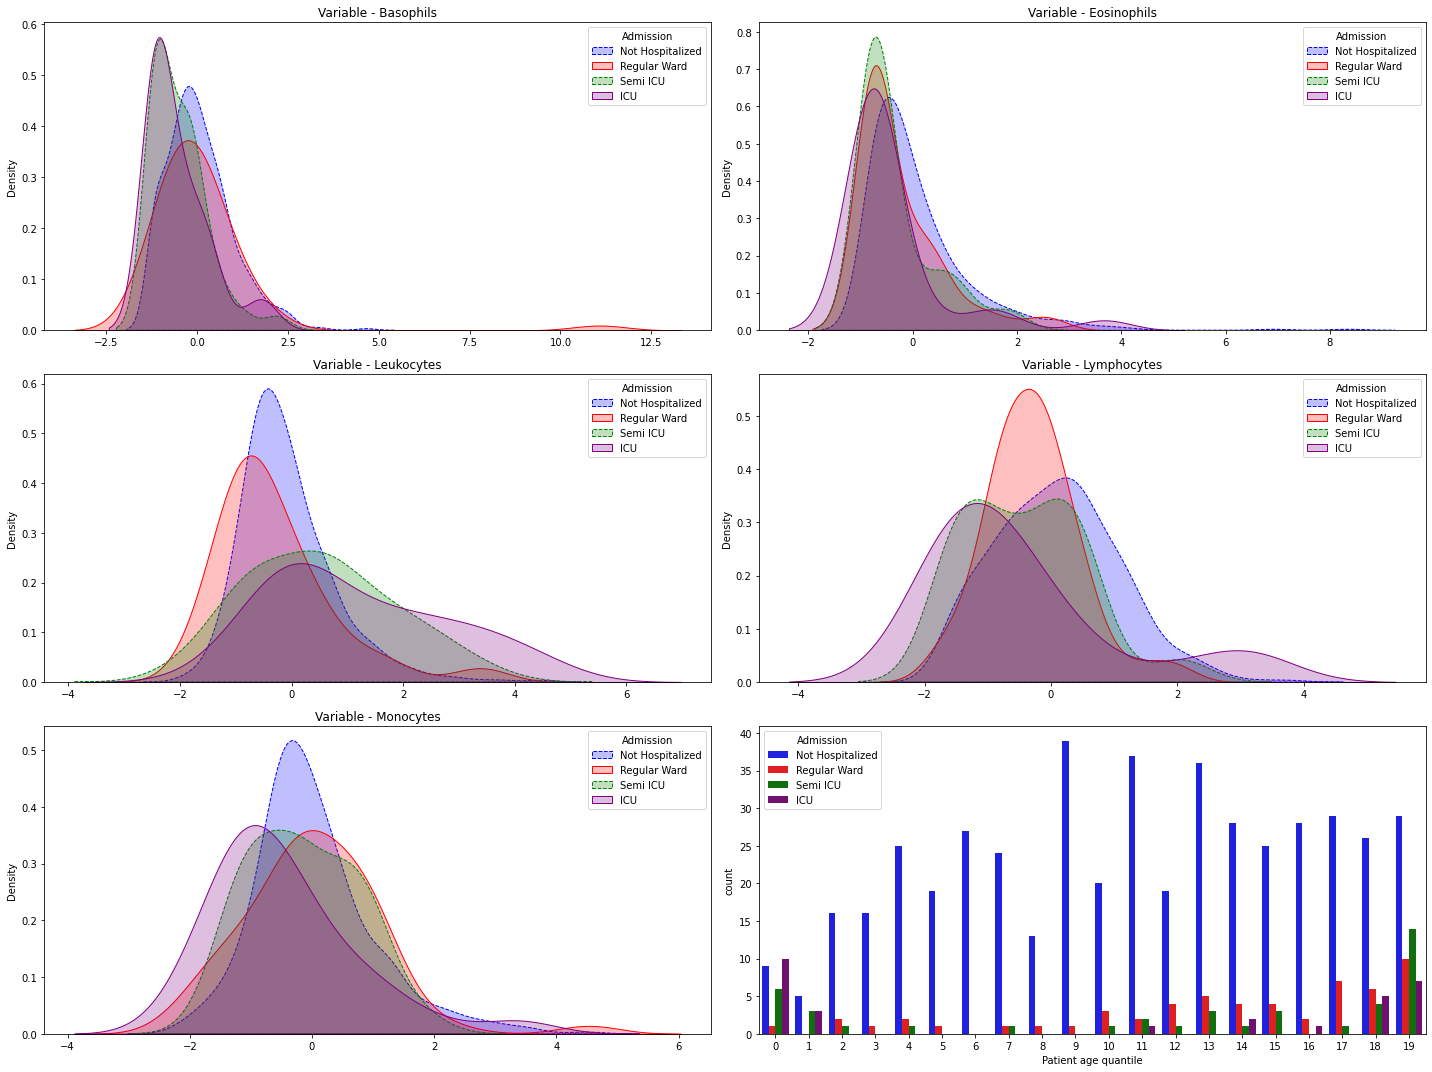

In [ ]:
# PLOT - KDE Dist plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
r = 0      # Index row
c = 0      # Index col

# Leucogram features
for f in leucogram_vars:
    # Plot distribuição
    sns.kdeplot(list(target_0[f]), shade=True, color='blue', ax=axes[r][c], label='Not Hospitalized', linestyle="--")
    sns.kdeplot(list(target_1[f]), shade=True, color='red', ax=axes[r][c], label='Regular Ward')
    sns.kdeplot(list(target_2[f]), shade=True, color='green', ax=axes[r][c], label='Semi ICU', linestyle="--")
    sns.kdeplot(list(target_3[f]), shade=True, color='purple', ax=axes[r][c], label='ICU')
    # Plot configs
    axes[r][c].legend(title='Admission', loc='right left')
    axes[r][c].set_title('Variable - ' + f)
    # Index control
    c += 1
    if c > 1:
        c = 0
        r += 1
        
# Age feature
sns.countplot(x='Patient age quantile', hue='Patient admission', data=data,
              palette={0:'blue',1:'red',2:'green',3:'purple'})
axes[r][c].legend(labels=['Not Hospitalized', 'Regular Ward','Semi ICU','ICU'], title='Admission', loc='upper left')

plt.tight_layout()

## Categorical Distributions

In [ ]:
# Set dataset to evaluate
data = df

### Distribution of Exams with Patient admission

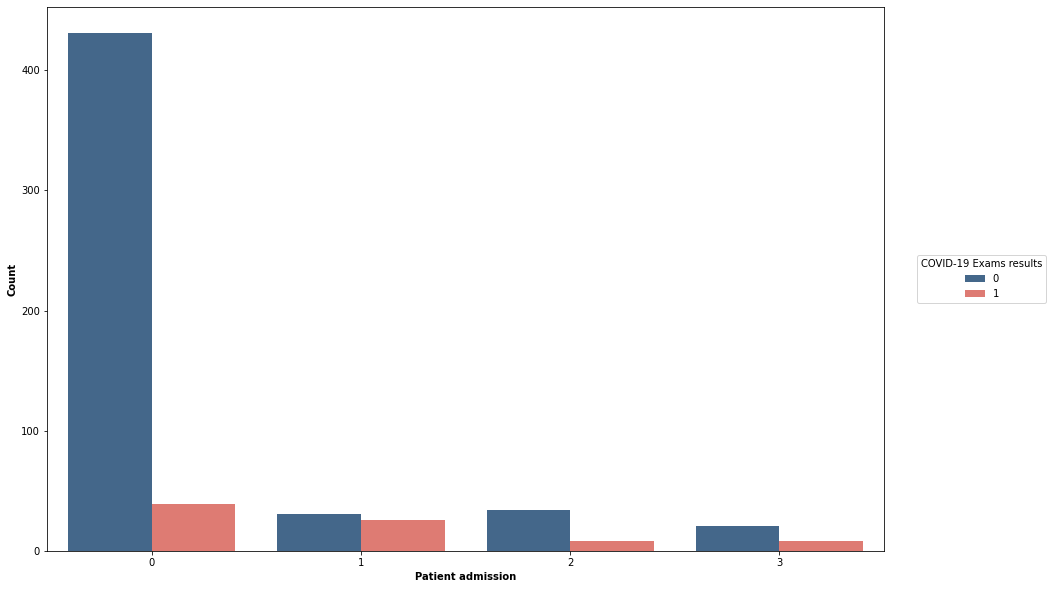

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Patient admission', hue='COVID-19 Exam result', data=data,palette={0:'#386796',1:'#F06C61'})
plt.legend(title='COVID-19 Exams results', loc='center right', bbox_to_anchor=(1.20, 0.5))
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Patient admission',  fontweight='bold');

### Distribution of COVID Exams with Age

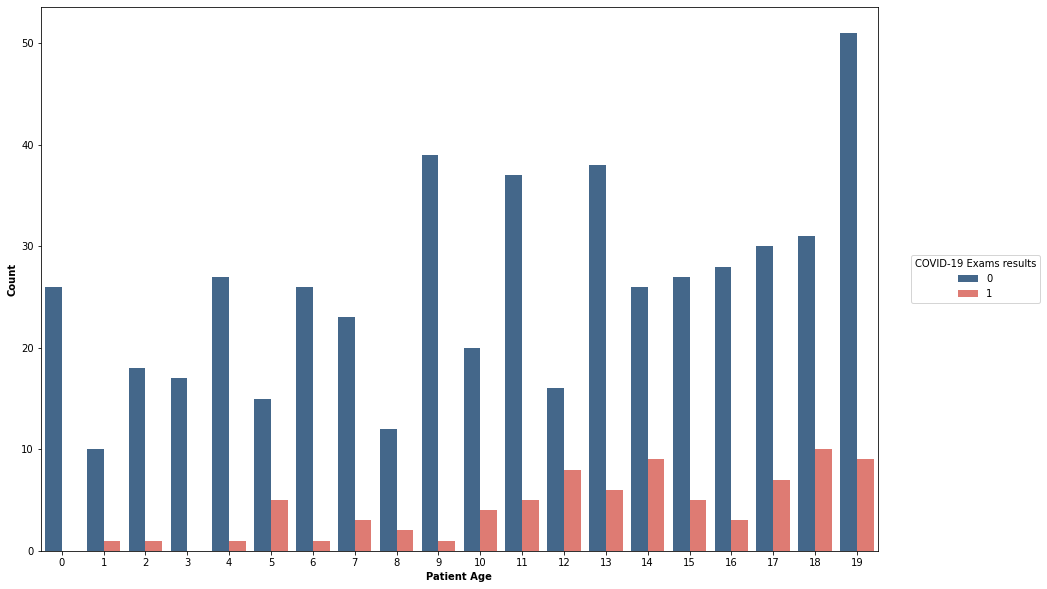

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Patient age quantile', hue='COVID-19 Exam result', data=data, palette={0:'#386796',1:'#F06C61'})
plt.legend(title='COVID-19 Exams results', loc='center right', bbox_to_anchor=(1.20, 0.5))
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Patient Age',  fontweight='bold');

### Distribution Patient admission with Age quantile

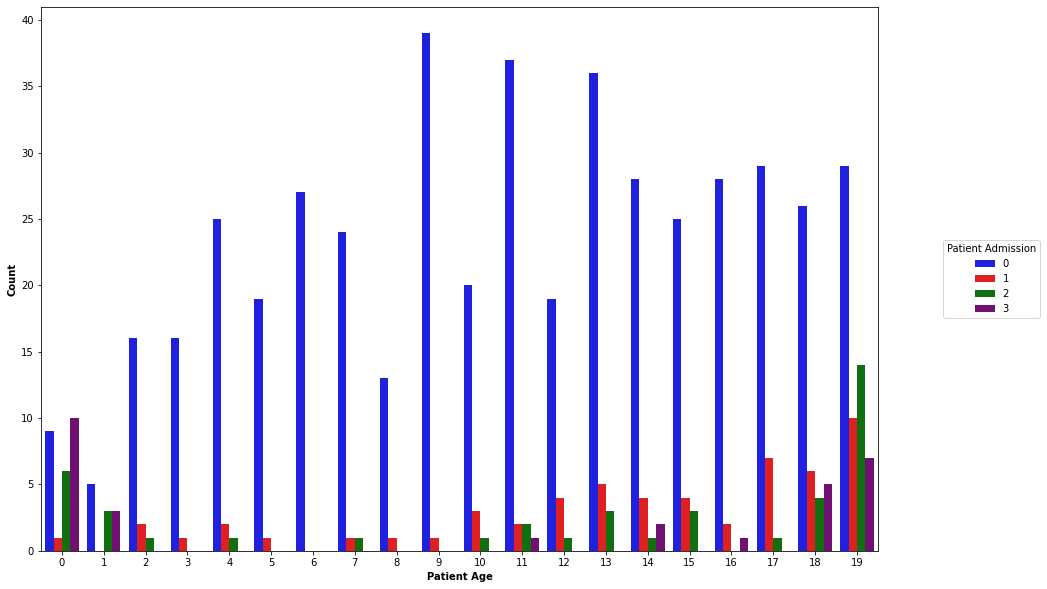

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Patient age quantile', hue='Patient admission', data=data,palette={0:'blue',1:'red',2:'green',3:'purple'})
plt.legend(title='Patient Admission', loc='center right', bbox_to_anchor=(1.20, 0.5))
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Patient Age',  fontweight='bold');

### Distribution COVID-19 Exams for Has any respiratory disease

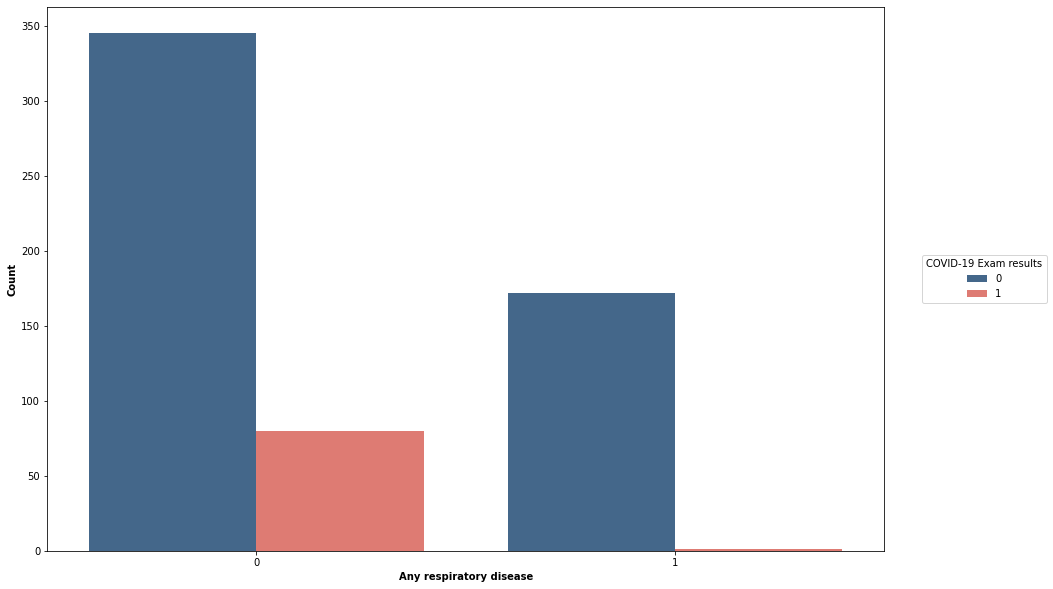

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Respiratory Disease detection', hue='COVID-19 Exam result', data=data,palette={0:'#386796',1:'#F06C61'})
plt.legend(title='COVID-19 Exam results', loc='center right', bbox_to_anchor=(1.20, 0.5))
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Any respiratory disease',  fontweight='bold');

## Commentary
Given this dataset, most of the cases are present in **Negative cases** for respiratory diseases, i.e. most of the pacients that presents COVID-19 didn't not present any other respiratory disease. This can be useful for our backtest.

# Export dataset

In [ ]:
df.to_csv('/content/drive/MyDrive/paper-code-for-explainable-AI-in-COVID-prediction-master/results_EDA/reuslt_me.csv',index=False)